<a href="https://colab.research.google.com/github/day28645/Applied-Data-Science/blob/main/final_churn_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Required libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
ROOT = "/content/drive"
drive.mount(ROOT)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load Dataset (CSV Format)

In [ ]:
# Read CSV file
csv_file = "/content/drive/MyDrive/COS3302/data_science_final/Churn_Modelling.csv"
df = pd.read_csv(csv_file)

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Exploring data

## Basic Information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.shape

(10000, 14)

In [ ]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [ ]:
df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']].describe().round(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,650.53,38.92,5.01,76485.89,1.53,100090.24
std,96.65,10.49,2.89,62397.41,0.58,57510.49
min,350.00,18.00,0.00,0.00,1.00,11.58
25%,584.00,32.00,3.00,0.00,1.00,51002.11
50%,652.00,37.00,5.00,97198.54,1.00,100193.92
75%,718.00,44.00,7.00,127644.24,2.00,149388.25
max,850.00,92.00,10.00,250898.09,4.00,199992.48


In [ ]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [ ]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [ ]:
df['HasCrCard'].value_counts()

,count
HasCrCard,
1,7055
0,2945


In [ ]:
df['IsActiveMember'].value_counts()

,count
IsActiveMember,
1,5151
0,4849


In [ ]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


In [ ]:
df["HasCrCard"]= df["HasCrCard"].map({0: "No", 1: "Yes"})
df["IsActiveMember"]= df["IsActiveMember"].map({0: "No", 1: "Yes"})
df["Exited"]= df["Exited"].map({0: "No", 1: "Yes"})
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,Yes,Yes,101348.88,Yes
1,608,Spain,Female,41,1,83807.86,1,No,Yes,112542.58,No
2,502,France,Female,42,8,159660.80,3,Yes,No,113931.57,Yes
3,699,France,Female,39,1,0.00,2,No,No,93826.63,No
4,850,Spain,Female,43,2,125510.82,1,Yes,Yes,79084.10,No


## Data Visualization

### Pie Chart

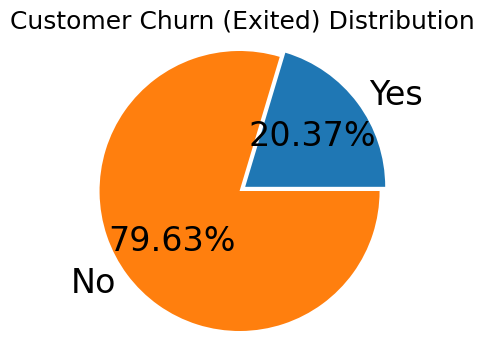

In [ ]:
labels = 'Yes', 'No'
sizes = [df.Exited[df['Exited']=="Yes"].count(),
         df.Exited[df['Exited']=="No"].count()]
explode = (0, 0.05)
fig1, ax1 = plt.subplots(figsize=(4, 4))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%', textprops={'fontsize': 24})
ax1.axis('equal')
plt.title('Customer Churn (Exited) Distribution', fontsize=18)
plt.show()

### Histogram

array([[<Axes: title={'center': 'CreditScore'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Tenure'}>],
       [<Axes: title={'center': 'Balance'}>,
        <Axes: title={'center': 'NumOfProducts'}>,
        <Axes: title={'center': 'EstimatedSalary'}>],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

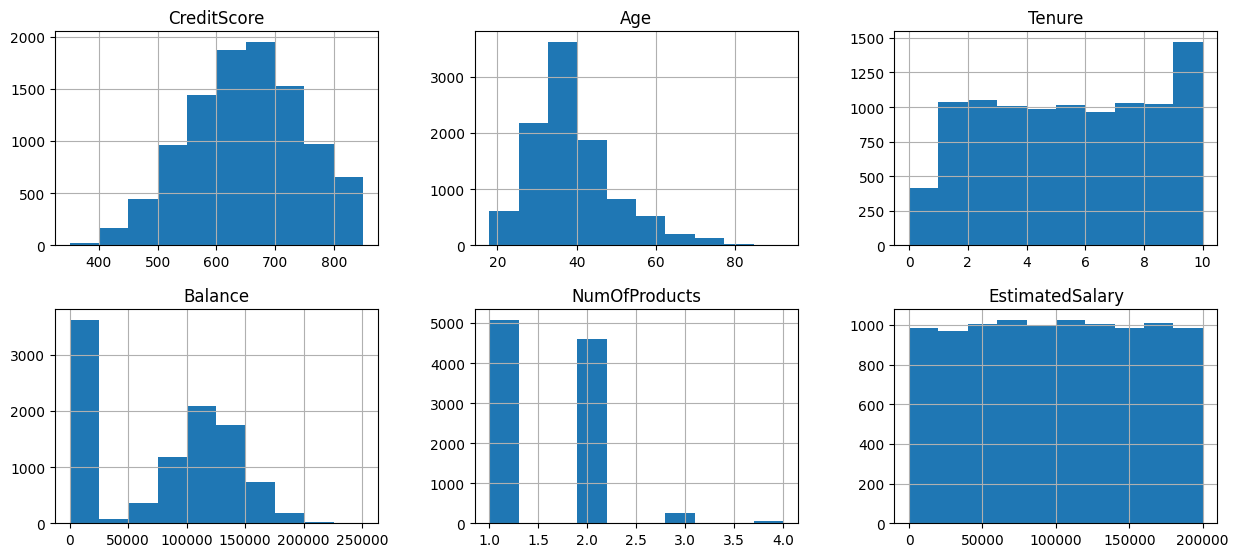

In [ ]:
numerical_features = df.select_dtypes(include=['float', 'int'])
numerical_features.hist(figsize=(15,10), layout=(3, 3))

<Axes: xlabel='IsActiveMember', ylabel='count'>

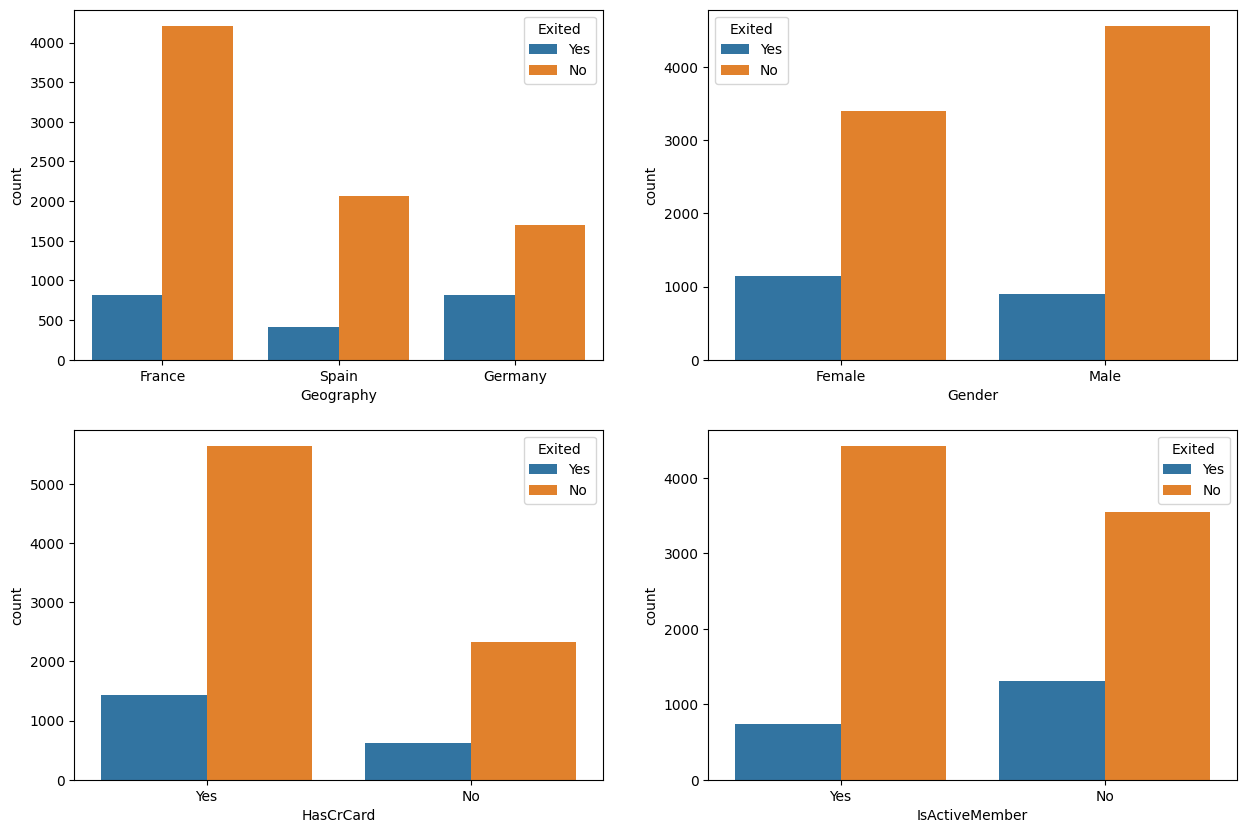

In [ ]:
fig, axarr = plt.subplots(2, 2, figsize=(15, 10))
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1])

### Box Plot

<ipython-input-20-3192727ab1df>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Exited", y='CreditScore', palette="flare")


<Axes: xlabel='Exited', ylabel='CreditScore'>

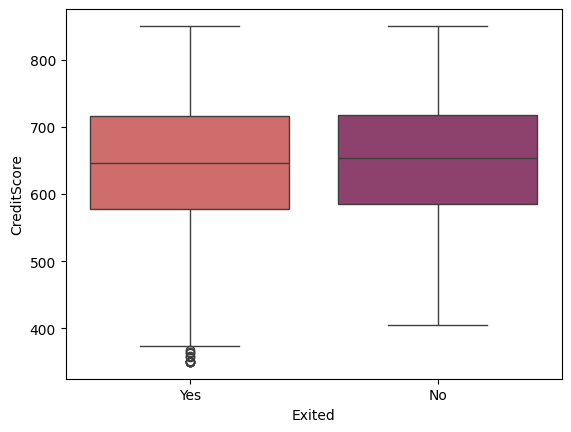

In [ ]:
sns.boxplot(data=df, x="Exited", y='CreditScore', palette="flare")

<ipython-input-21-bb30590fdabf>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Exited", y='Age', palette="flare")


<Axes: xlabel='Exited', ylabel='Age'>

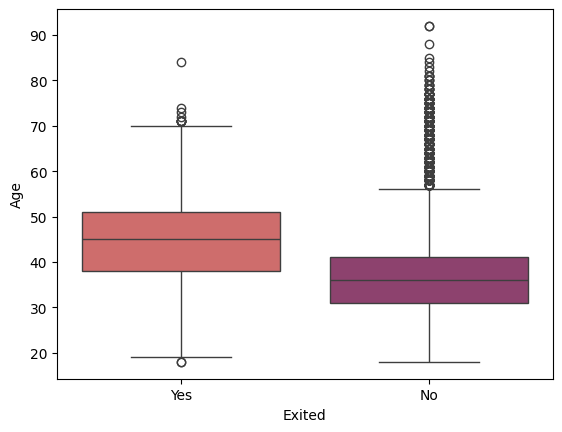

In [ ]:
sns.boxplot(data=df, x="Exited", y='Age', palette="flare")

<ipython-input-22-866bd6acc206>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Exited", y='Tenure', palette="flare")


<Axes: xlabel='Exited', ylabel='Tenure'>

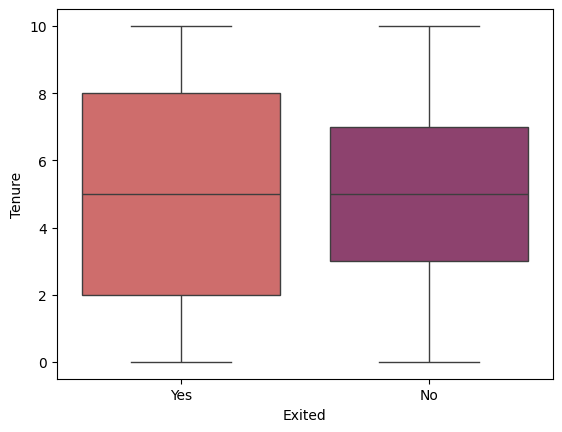

In [ ]:
sns.boxplot(data=df, x="Exited", y='Tenure', palette="flare")

<ipython-input-23-cfe5dce7f860>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Exited", y='Balance', palette="flare")


<Axes: xlabel='Exited', ylabel='Balance'>

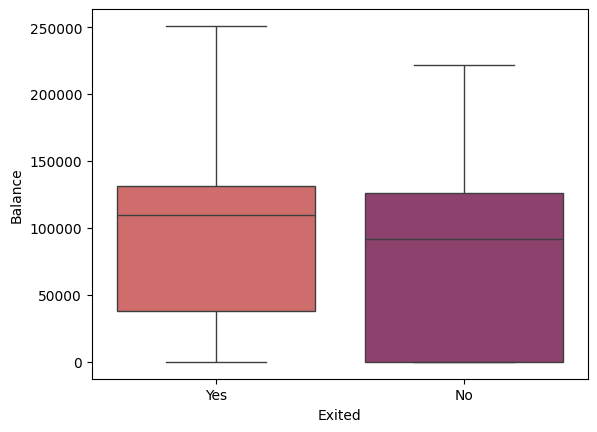

In [ ]:
sns.boxplot(data=df, x="Exited", y='Balance', palette="flare")

<ipython-input-24-591478af78a5>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Exited", y='NumOfProducts', palette="flare")


<Axes: xlabel='Exited', ylabel='NumOfProducts'>

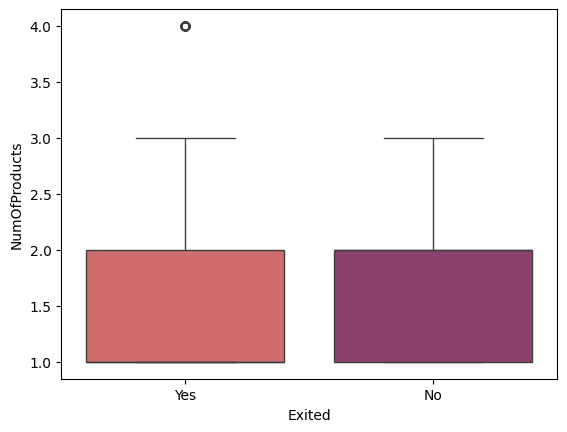

In [ ]:
sns.boxplot(data=df, x="Exited", y='NumOfProducts', palette="flare")

<ipython-input-25-b7654e765e74>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Exited", y='EstimatedSalary', palette="flare")


<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

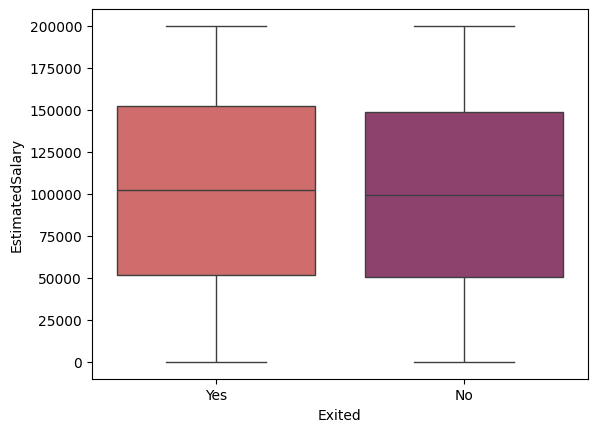

In [ ]:
sns.boxplot(data=df, x="Exited", y='EstimatedSalary', palette="flare")

### Pair Plot

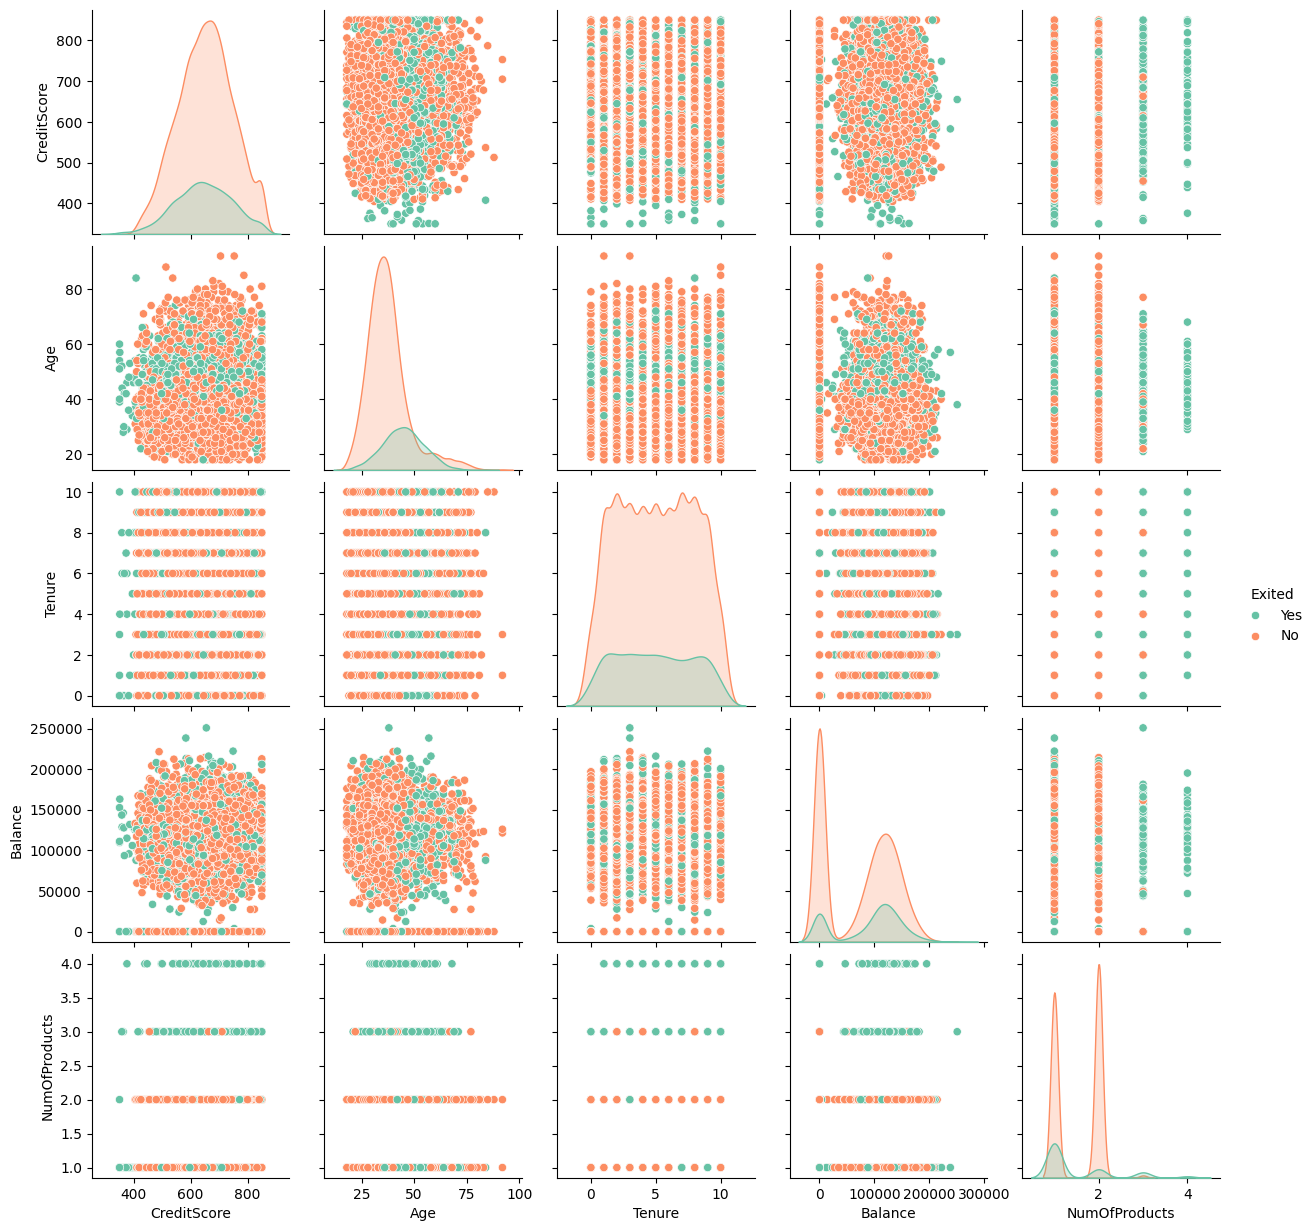

In [ ]:
# sns.pairplot(df, height=3, diag_kind='kde', hue='Classes', palette="Set2")
sns.pairplot(df, x_vars=["CreditScore", "Age", "Tenure" , "Balance", "NumOfProducts"],
                 y_vars=["CreditScore", "Age", "Tenure" , "Balance", "NumOfProducts"],
                 hue='Exited', palette="Set2")

### Correlation Matrix

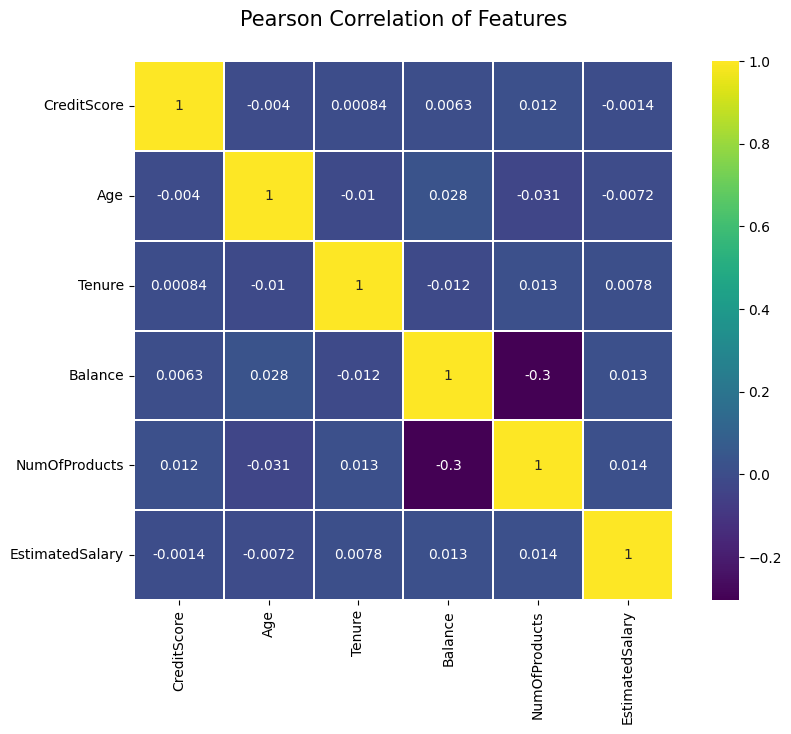

In [ ]:
numeric_data = df.select_dtypes(include=[np.number])
corr = numeric_data.corr()

# Create the heatmap
f, ax = plt.subplots(figsize=(10, 7))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
_ = sns.heatmap(corr, cmap="viridis", square=True, ax=ax, annot=True, linewidth=0.1)
plt.title('Pearson Correlation of Features', y=1.05, size=15)
plt.show()

# KNN

## Data Manipulation

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,Yes,Yes,101348.88,Yes
1,608,Spain,Female,41,1,83807.86,1,No,Yes,112542.58,No
2,502,France,Female,42,8,159660.80,3,Yes,No,113931.57,Yes
3,699,France,Female,39,1,0.00,2,No,No,93826.63,No
4,850,Spain,Female,43,2,125510.82,1,Yes,Yes,79084.10,No


In [ ]:
from sklearn.preprocessing import LabelEncoder

def obj_to_int(df_col):
  if df_col.dtype=='object':
    df_col=LabelEncoder().fit_transform(df_col)
  return df_col

In [ ]:
df_processed= df.apply(lambda x: obj_to_int(x))
df_processed.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
X = df_processed.drop(columns=['Exited']).values
Y = df_processed['Exited'].values

## Spilt Train Set and Test Set

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

## Scaling by StandardScaler


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## No PCA

In [ ]:
testdata = pd.DataFrame(
           X_test,
           columns = ["CreditScore", "Geography", "Gender", "Age" ,"Tenure" ,"Balance" ,"NumOfProducts" , "HasCrCard", "IsActiveMember", "EstimatedSalary"])

In [ ]:
traindata = pd.DataFrame(
            X_train,
            columns = ["CreditScore", "Geography", "Gender", "Age" ,"Tenure" ,"Balance" ,"NumOfProducts" , "HasCrCard", "IsActiveMember", "EstimatedSalary"])

In [ ]:
testdata.describe().round(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00
mean,-0.06,-0.02,0.00,0.01,0.02,0.03,-0.01,0.02,0.02,-0.03
std,1.01,0.99,1.00,0.99,1.02,0.99,1.02,0.99,1.00,1.00
min,-3.13,-0.91,-1.09,-1.99,-1.74,-1.22,-0.92,-1.54,-1.03,-1.75
25%,-0.76,-0.91,-1.09,-0.66,-1.04,-1.22,-0.92,-1.54,-1.03,-0.88
50%,-0.05,-0.91,0.91,-0.09,-0.00,0.38,-0.92,0.65,0.97,-0.03
75%,0.63,0.30,0.91,0.49,1.04,0.83,0.81,0.65,0.97,0.82
max,2.06,1.51,0.91,5.05,1.73,2.24,4.26,0.65,0.97,1.73


In [ ]:
traindata.describe().round(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,8000.00,8000.00,8000.00,8000.00,8000.00,8000.00,8000.00,8000.00,8000.00,8000.00
mean,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-3.13,-0.91,-1.09,-1.99,-1.74,-1.22,-0.92,-1.54,-1.03,-1.74
25%,-0.69,-0.91,-1.09,-0.66,-0.70,-1.22,-0.92,-1.54,-1.03,-0.85
50%,0.01,0.30,0.91,-0.18,-0.00,0.33,-0.92,0.65,0.97,0.00
75%,0.70,0.30,0.91,0.49,0.69,0.82,0.81,0.65,0.97,0.85
max,2.06,1.51,0.91,5.05,1.73,2.80,4.26,0.65,0.97,1.73


### KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=101)
classifier.fit(X_train, y_train)
classifier.score(X_train, y_train)

0.822375

### Classifier Performance Evalution

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
y_pred.shape

(2000,)

### Confusion Matrix

In [ ]:
#Evaluating the algorithm
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
#print(classification_report(y_test, y_pred))

[[1597   10]
 [ 333   60]]


Confusion matrix, without normalization


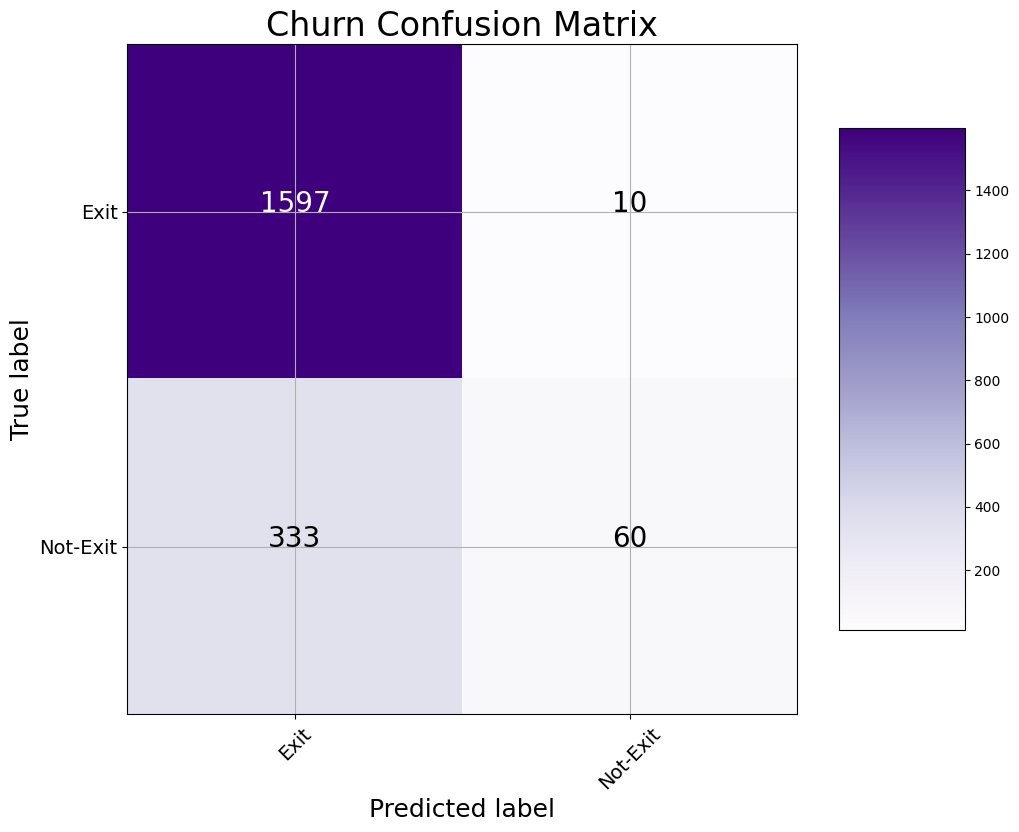

In [ ]:
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Oranges):

# This function prints and plots the confusion matrix.
# Normalization can be applied by setting `normalize=True`.
# Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html***
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    # Plot the confusion matrix
    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20, horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes = ['Exit', 'Not-Exit'], title = 'Churn Confusion Matrix', cmap=plt.cm.Purples)

#plt.savefig('cm.png')

### Error

In [ ]:
error = []
# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

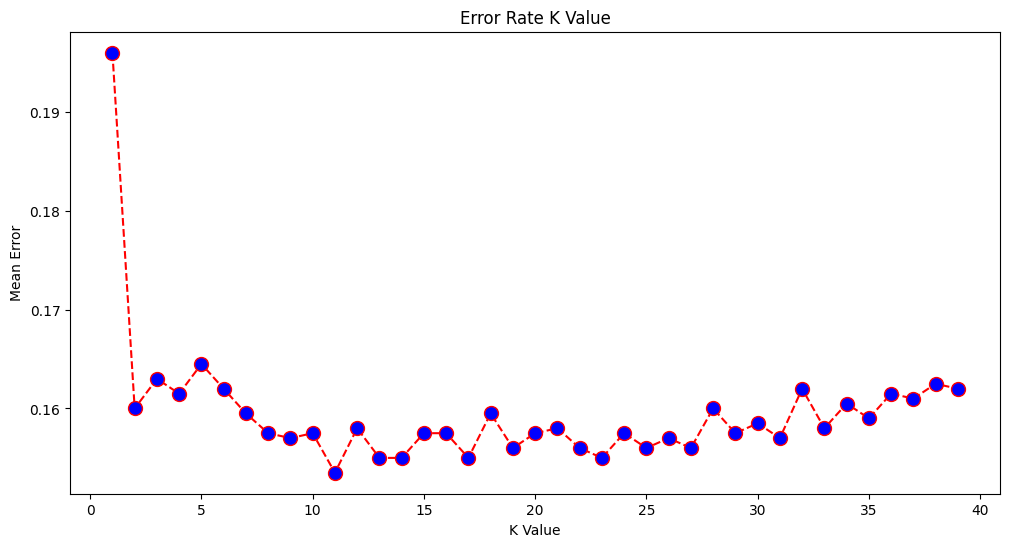

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

## PCA

### KNN Classifier

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_pca.shape

(10000, 2)

### Classifier Performance Evalution

In [ ]:
pca.explained_variance_ratio_

array([0.54118404, 0.45881465])

In [ ]:
pca.explained_variance_ratio_.sum()

0.9999986860772736

In [ ]:
pca.n_components_

2

In [ ]:
X_pca

array([[-76157.14598031,   7194.7616391 ],
       [  8266.91041411,  11846.1056215 ],
       [ 83998.63333719,   7340.13343604],
       ...,
       [-80759.55513009, -51889.55592413],
       [ -1965.6062396 ,  -7070.42405252],
       [ 48687.71619761, -65879.53097992]])

In [ ]:
from sklearn.linear_model import LogisticRegression
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, Y, test_size=0.2, random_state=30)
model = LogisticRegression()

model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)

0.782

### Confusion Matrix

In [ ]:
#Evaluating the algorithm
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
#print(classification_report(y_test, y_pred))

[[1507   57]
 [ 423   13]]


Confusion matrix, without normalization


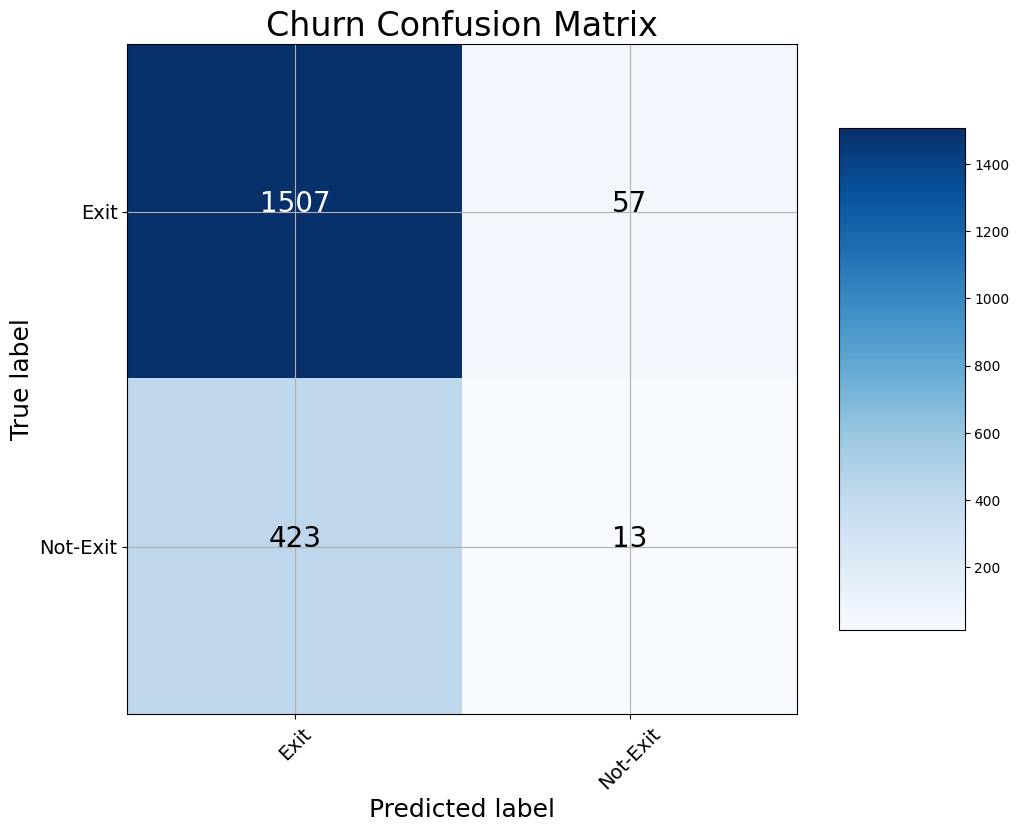

In [ ]:
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Oranges):

# This function prints and plots the confusion matrix.
# Normalization can be applied by setting `normalize=True`.
# Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html***
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    # Plot the confusion matrix
    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20, horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes = ['Exit', 'Not-Exit'], title = 'Churn Confusion Matrix', cmap=plt.cm.Blues)

#plt.savefig('cm.png')

### Error

In [ ]:
error = []
# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

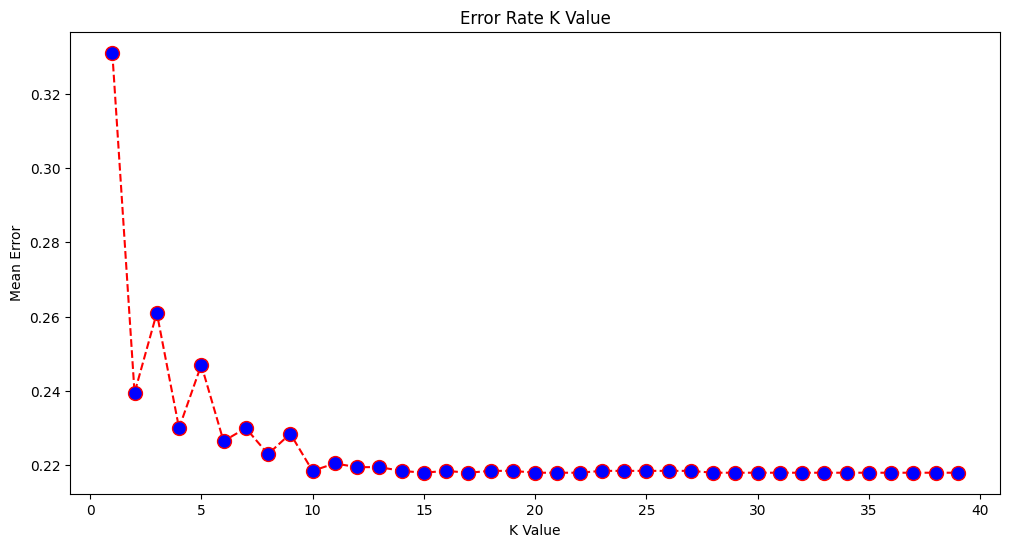

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

# K-means Clustering

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,Yes,Yes,101348.88,Yes
1,608,Spain,Female,41,1,83807.86,1,No,Yes,112542.58,No
2,502,France,Female,42,8,159660.80,3,Yes,No,113931.57,Yes
3,699,France,Female,39,1,0.00,2,No,No,93826.63,No
4,850,Spain,Female,43,2,125510.82,1,Yes,Yes,79084.10,No


In [ ]:
df_process_kmeans = df.apply(lambda x: obj_to_int(x))
df_process_kmeans.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df_process_kmeans = df_process_kmeans.drop(columns=['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited'])

In [ ]:
df_process_kmeans.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
0,619,42,2,0.00,1,101348.88
1,608,41,1,83807.86,1,112542.58
2,502,42,8,159660.80,3,113931.57
3,699,39,1,0.00,2,93826.63
4,850,43,2,125510.82,1,79084.10


In [ ]:
df_process_kmeans = df_process_kmeans.drop(columns=["Tenure", "NumOfProducts", "Balance", "NumOfProducts" ,"EstimatedSalary"])

In [ ]:
df_process_kmeans.describe().round(2)

,CreditScore,Age
count,10000.00,10000.00
mean,650.53,38.92
std,96.65,10.49
min,350.00,18.00
25%,584.00,32.00
50%,652.00,37.00
75%,718.00,44.00
max,850.00,92.00


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_process_kmeans)
X_scaled

array([[-0.32622142,  0.29351742],
       [-0.44003595,  0.19816383],
       [-1.53679418,  0.29351742],
       ...,
       [ 0.60498839, -0.27860412],
       [ 1.25683526,  0.29351742],
       [ 1.46377078, -1.04143285]])

### Parameters : init = k-means++

In [ ]:
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

wcss_kmpp = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=42)
    kmeans.fit(X_scaled)
    wcss_kmpp.append(kmeans.inertia_)
    df_process_kmeans['cluster'] = kmeans.labels_

In [ ]:
# Calculate the average values for each cluster
cluster_analysis = df_process_kmeans.groupby('cluster').mean()

# Print the cluster analysis
print(cluster_analysis)

         CreditScore        Age
cluster                        
0         795.764950  35.114618
1         586.144976  29.778827
2         732.544879  48.636748
3         598.562588  43.142757
4         678.038143  37.389165
5         702.641804  27.499566
6         554.387569  57.643510
7         705.898515  66.470297
8         492.636275  36.509214


### Elbow plot

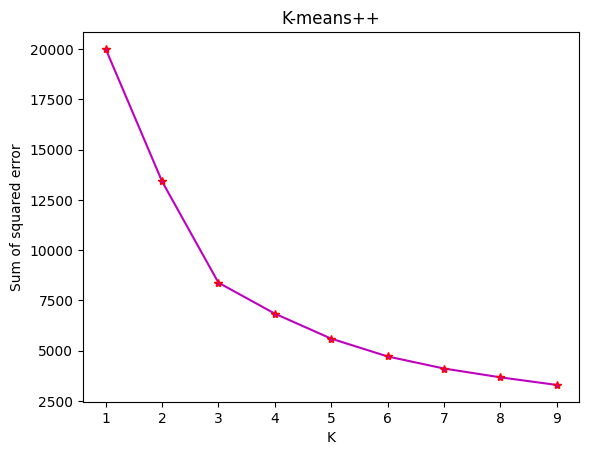

In [ ]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.title('K-means++')
plt.ticklabel_format(style='plain')
plt.plot(range(1,10), wcss_kmpp, 'm-' ,marker='*', markeredgecolor='r')

### K = 3

In [ ]:
# from above array with help of elbow method
#we can get no of cluster to provide.
kmeans_rd = KMeans(n_clusters=3,
                init='k-means++',
                max_iter=300,
                n_init=10,
                random_state=0)
y_kmeans_rd = kmeans_rd.fit_predict(X_scaled)

In [ ]:
kmeans_rd.inertia_

8384.232152610773

In [ ]:
unique, counts = np.unique(y_kmeans_rd, return_counts=True)

print(np.asarray((unique, counts)).T)

[[   0 4274]
 [   1 3938]
 [   2 1788]]


### Visualizing the clusters

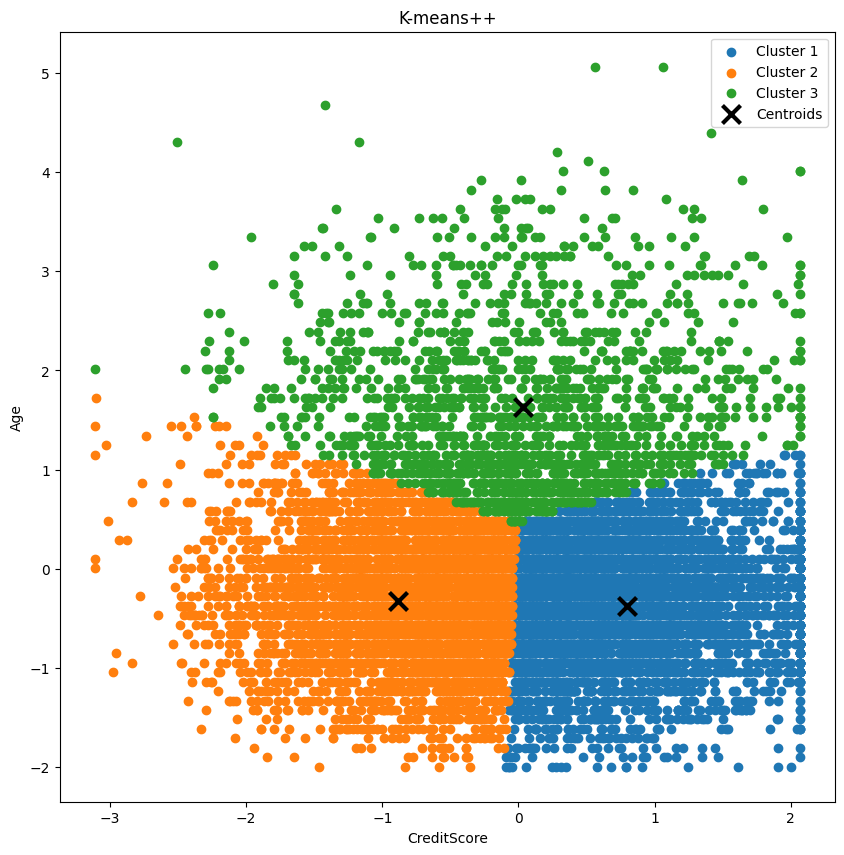

In [ ]:
plt.figure(figsize=(10, 10))
plt.title('K-means++')

for label in range(3):
    plt.scatter(X_scaled[y_kmeans_rd == label, 0],
                X_scaled[y_kmeans_rd == label, 1],
                label=f'Cluster {label+1}')

plt.scatter(kmeans_rd.cluster_centers_[:, 0],
            kmeans_rd.cluster_centers_[:, 1],
            marker='x', s=169, linewidths=3,
            color='k', zorder=10,
            label='Centroids')

plt.xlabel('CreditScore')
plt.ylabel('Age')
plt.legend()
plt.show()